# Result for 1D Ginzburg Landau

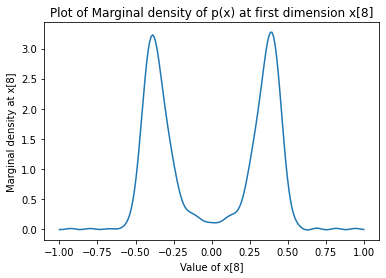

In [1]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt

# Load problem parameter
d = 64
L = 6
deg = 15

# Load data
data_path = f"./Data_deposit_script/Saved_Data/1D_GZ_data_d_{d}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples'][:, 1:-1]
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y = all_samples / 2.5
y = y[:6000, :]

r = dict()
s = dict()
r_level = 6 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 5 + 0*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]



# Hierarchical Tensor Sketching
c, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y, L, d, deg, r = r, s = s, debug = True)
np.savez(f"./Data_deposit_script/Saved_Data/1D_GZ_data_d_{d}_solved_core.npz", c=c, A_dict = A_dict, B_dict = B_dict)
htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])

x = np.zeros([200, d])
x[:, 8] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, 8], htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != 8]))
plt.xlabel('Value of x[8]')
plt.ylabel('Marginal density at x[8]')
plt.title('Plot of Marginal density of p(x) at first dimension x[8]')
plt.show()



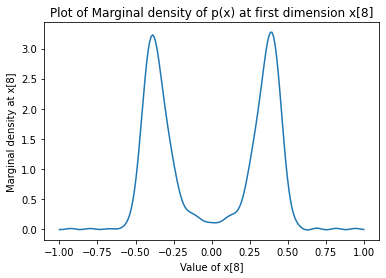

In [2]:
htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])

x = np.zeros([200, d])
x[:, 8] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, 8], htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != 8]))
# plt.ylim([-100, np.max(tt_obtained.evaluate_marginal(x, mask = [1,2]))])
plt.xlabel('Value of x[8]')
plt.ylabel('Marginal density at x[8]')
plt.title('Plot of Marginal density of p(x) at first dimension x[8]')
plt.show()


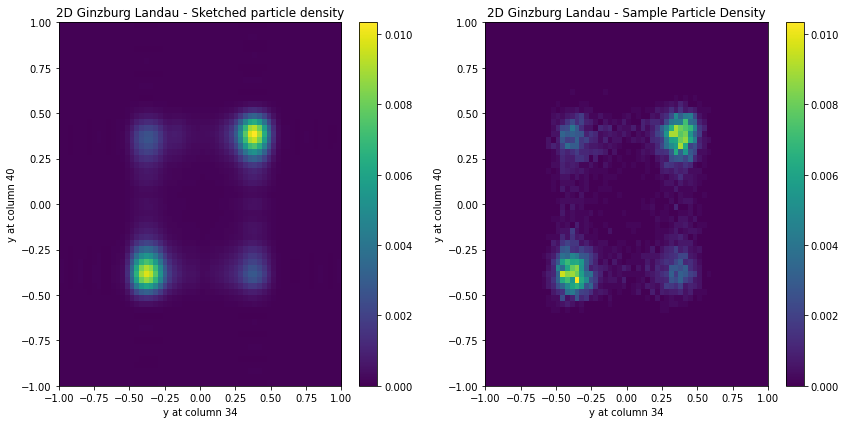

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters for columns
col1, col2 = 34, 40

# Create a grid
n_grid = 60
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap[i, j] = evaluated_marginal[i*n_grid + j]
heatmap /= heatmap.sum()
# Extract the particle positions
particles = y[:, [col1, col2]]

# Create a 2D histogram for particles
hist, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist /= hist.sum()  # Normalize

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
# fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_title("2D Ginzburg Landau - Sketched particle density")
axes[0].set_xlabel(f"y at column {col1}")
axes[0].set_ylabel(f"y at column {col2}")

# Heatmap for particles
im2 = axes[1].imshow(hist, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
# fig.colorbar(im2, ax=axs, fraction=0.046, pad=0.04)
axes[1].set_title("2D Ginzburg Landau - Sample Particle Density")
axes[1].set_xlabel(f"y at column {col1}")
axes[1].set_ylabel(f"y at column {col2}")

plt.tight_layout()

cbar = fig.colorbar(im2, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')
# cbar.ax.set_ylabel('Probability', fontsize=12)

# plt.savefig("1D_GZ.pdf", format="pdf", dpi=300)


plt.show()


# Result for 2D Ginzburg Landau

In [4]:
import importlib
import functional_hierarchical_tensor_sketch
importlib.reload(functional_hierarchical_tensor_sketch)
from functional_hierarchical_tensor_sketch import hier_tensor_sketch


In [5]:
import random
from itertools import islice

def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def transform_3d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n))
    
    for i in range(n):
        for j in range(n):
            col_idx = interlace(i, j, l)
            transformed_data[:, col_idx] = data[:, i, j]
    
    return transformed_data


def nbhd_int_fun_2d(node, L):
    k, l = node
    k_bin = int_to_bin(k - 1, l)
    node_1 = k_bin + (L-l)*'0'
    node_2 = k_bin + (L-l)*'1'
    i_min, j_min = revert_interlace_2d(int(node_1, 2), int(L/2))
    i_max, j_max = revert_interlace_2d(int(node_2, 2), int(L/2))

    i_candidate = [i_min, i_max]
    j_candidate = [j_min, j_max]

    nbhd_int = []

    for i in i_candidate:
        j_list = list(islice(list(range(j_min, j_max + 1)), min(1, j_max - j_min + 1)))
        j_list += list(islice(reversed(list(range(j_min, j_max + 1))), min(1, j_max - j_min + 1)))
        j_list = list(set(j_list))
        for j in j_list:
            nbhd_int.append(interlace(i, j, int(L/2)) + 1)

    for j in j_candidate:
        i_list = list(islice(list(range(i_min, i_max + 1)), min(1, i_max - i_min + 1)))
        i_list += list(islice(reversed(list(range(i_min, i_max + 1))), min(1, i_max - i_min + 1)))
        i_list = list(set(i_list))

        for i in i_list:
            nbhd_int.append(interlace(i, j, int(L/2)) + 1)
    nbhd_int = sorted(list(set(nbhd_int)))
    return list(set(nbhd_int))

def nbhd_fun_2d(node, L):
    k, l = node
    k_bin = int_to_bin(k - 1, l)
    node_1 = k_bin + (L-l)*'0'
    node_2 = k_bin + (L-l)*'1'
    i_min, j_min = revert_interlace_2d(int(node_1, 2), int(L/2))
    i_max, j_max = revert_interlace_2d(int(node_2, 2), int(L/2))
    
    if i_min == 0 and i_max == 2 ** (int(L/2)) - 1:
        i_candidate = []
    elif i_min == 0:
        i_candidate = [i_max + 1]
    elif i_max == 2 ** (int(L/2)) - 1:
        i_candidate = [i_min - 1]
    else:
        i_candidate = [i_max + 1, i_min - 1]
    
    if j_min == 0 and j_max == 2 ** (int(L/2)) - 1:
        j_candidate = []
    elif j_min == 0:
        j_candidate = [j_max + 1]
    elif j_max == 2 ** (int(L/2)) - 1:
        j_candidate = [j_min - 1]
    else:
        j_candidate = [j_max + 1, j_min - 1]
    
    nbhd = []
    
    for i in i_candidate:
        j_list = list(islice(list(range(j_min, j_max + 1)), min(1, j_max + 1 - j_min)))
        j_list += list(islice(reversed(list(range(j_min, j_max + 1))), min(1, j_max + 1 - j_min)))
        j_list += [(j_max + j_min) // 2]

        for j in j_list:
            nbhd.append(interlace(i, j, int(L/2)) + 1)
    
    for j in j_candidate:
        i_list = list(islice(list(range(i_min, i_max + 1)), min(1, i_max + 1 - i_min)))
        i_list = list(islice(reversed(list(range(i_min, i_max + 1))), min(1, i_max + 1 - i_min)))
        i_list += [(i_max + i_min) // 2]

        for i in i_list:
            nbhd.append(interlace(i, j, int(L/2)) + 1)
    return list(set(nbhd))


def revert_interlace_2d(k, l):
    # Convert the interlaced number back to binary.
    k_bin = int_to_bin(k, 2 * l)  # The length is doubled because it contains both i and j.
    
    # Separate the bits that belong to i and j.
    i_bits = k_bin[::2]  # Take every other bit, starting from the first
    j_bits = k_bin[1::2]  # Take every other bit, starting from the second

    # Convert these bits back to integers.
    i = int(i_bits, 2)
    j = int(j_bits, 2)

    return i, j


Original number of batches: 6000
Number of batches after filtering: 6000


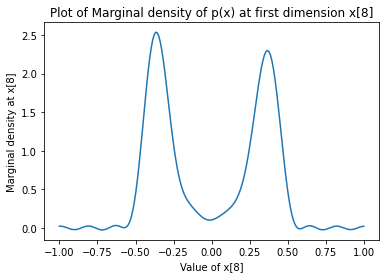

In [6]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt


def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def interlace(i, j, l):
    """Interlace the binary representations of i and j up to length l."""
    i_bin = int_to_bin(i, l)
    j_bin = int_to_bin(j, l)
    interlaced = ''.join([a + b for a, b in zip(i_bin, j_bin)])
    return int(interlaced, 2)

def transform_3d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n))
    
    for i in range(n):
        for j in range(n):
            col_idx = interlace(i, j, l)
            transformed_data[:, col_idx] = data[:, i, j]
    
    return transformed_data


# Load problem parameter
d = 64
L = 6
deg = 10

# Load data
data_path = f"./Data_deposit_script/Saved_Data/2D_GZ_data_d_{d}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples'][:, 1:-1, 1:-1]
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_2d = transform_3d_to_2d(filtered_samples)

    
r = dict()
s = dict()
r_level = 4 + 2*np.arange(L,0, -1)
r_level[0] = 10
r_level[1] = 10
s_level = 5 + 2*np.arange(L,0, -1)
s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]

# Normalize range to [-1, 1]
y_2d = data_2d / 2.5
y_2d = y_2d[:6000, :]

# Hierarchical Tensor Sketching
c_2d, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y_2d, L, d, deg, r = r, s = s, debug = True, nbhd_fun=nbhd_fun_2d, nbhd_int_fun=nbhd_int_fun_2d)

np.savez(f"./Data_deposit_script/Saved_Data/2D_GZ_data_d_{d}_solved_core.npz", c=c_2d, A_dict = A_dict, B_dict = B_dict)

htn_obtained_2d = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c_2d, deg = deg, ghost_pt = [])

x = np.zeros([200, d])
x[:, 8] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, 8], htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != 8]))
# plt.ylim([-100, np.max(tt_obtained.evaluate_marginal(x, mask = [1,2]))])
plt.xlabel('Value of x[8]')
plt.ylabel('Marginal density at x[8]')
plt.title('Plot of Marginal density of p(x) at first dimension x[8]')
plt.show()



/var/folders/y6/hwms99kn7s11lywczl1qct_c0000gn/T/ipykernel_42846/1936869344.py:38: UserWarning: Adding colorbar to a different Figure <Figure size 864x432 with 4 Axes> than <Figure size 864x432 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(im2, ax=axes[0], fraction=0.046, pad=0.04)


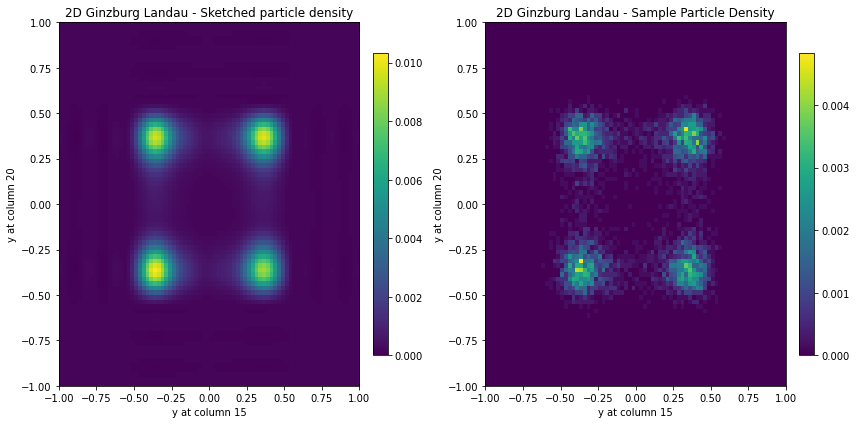

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters for columns
col1, col2 = 15, 20

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap[j, i] = evaluated_marginal[j*n_grid + i]
heatmap /= heatmap.sum()
# Extract the particle positions
particles = y_2d[:, [col1, col2]]

# Create a 2D histogram for particles
hist, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist /= hist.sum()  # Normalize

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(im2, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_title("2D Ginzburg Landau - Sketched particle density")
axes[0].set_xlabel(f"y at column {col1}")
axes[0].set_ylabel(f"y at column {col2}")

# Heatmap for particles
im2 = axes[1].imshow(hist, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
axes[1].set_title("2D Ginzburg Landau - Sample Particle Density")
axes[1].set_xlabel(f"y at column {col1}")
axes[1].set_ylabel(f"y at column {col2}")

plt.tight_layout()
plt.savefig("2D_GZ.pdf", format="pdf", dpi=300)

plt.show()


/var/folders/y6/hwms99kn7s11lywczl1qct_c0000gn/T/ipykernel_42846/779115846.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_correlation[i, j] = true_correlation_interlaced[interlace(i, j, l = L)]


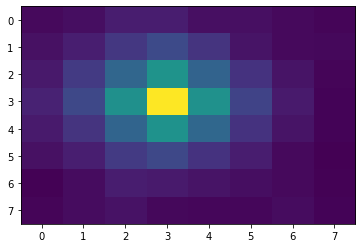

In [8]:
# Calculate two-point correlation
from copy import deepcopy
def two_pt_correlation(sample, dim):
    r'''
    Calculate the two pt correlation between target_dimension and every other dimension in the data
    '''
    data_dim = deepcopy(sample[:, dim].reshape(-1, 1))
    data_all = deepcopy(sample)
    data_dim = data_dim - np.mean(data_dim, axis = 0, keepdims = True)
    data_all = data_all - np.mean(data_all, axis = 0, keepdims = True)
    std_all = np.sqrt(np.mean(np.power(data_all, 2), axis = 0))
    std_dim = std_all[dim]
    correlation = 1/data_all.shape[0]*data_all.T@data_dim/(np.outer(std_all, std_dim))

    return correlation

dim_2d = int(np.sqrt(d))
col1 = interlace(int(dim_2d/2) - 1, int(dim_2d/2) - 1, 4)
true_correlation = np.zeros([dim_2d,dim_2d])
true_correlation_interlaced = two_pt_correlation(y_2d, dim=col1)
for i in range(dim_2d):
    for j in range(dim_2d):
        true_correlation[i, j] = true_correlation_interlaced[interlace(i, j, l = L)]

plt.imshow(true_correlation, aspect='auto', cmap='viridis')

In [9]:

correlations_list = []
correlation_list_2d = np.zeros(d)

for ftn_used in [htn_obtained_2d]:
    # Create a grid
    n_grid = 15
    xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
    X, Y = np.meshgrid(xx, yy)
    I, J = np.indices((n_grid, n_grid))
    X_flat = X[I, J].reshape(-1, 1)  # Transforming X values into a column
    Y_flat = Y[I, J].reshape(-1, 1)  # Transforming Y values into a column
    Z_vals = np.hstack((X_flat, Y_flat))  # This is equivalent to all z_val stacked

    # Pre-allocate the heatmap matrix
    heatmap = np.zeros((n_grid, n_grid))

    for col2 in range(d):
        if col2 != col1:
            x = np.zeros([n_grid*n_grid, d])
            x[np.arange(n_grid * n_grid)[:, None], [col1, col2]] = Z_vals
            evaluated_marginal = ftn_used.evaluate_marginal(deepcopy(x), mask=[x + 1 for x in range(d) if not x in [col1, col2]])
            heatmap = evaluated_marginal.reshape(n_grid, n_grid)
            heatmap /= heatmap.sum()
            cov = np.sum(heatmap*X*Y)
            std_X = np.sqrt(np.sum(heatmap*X*X) - (np.sum(heatmap*X) ** 2))
            std_Y = np.sqrt(np.sum(heatmap*Y*Y) - (np.sum(heatmap*Y) ** 2))
            cor = cov * 1/std_X * 1/std_Y
            correlation_list_2d[col2] = cor
        else:
            correlation_list_2d[col2] = 1
    correlations_list.append(deepcopy(correlation_list_2d))

true_correlation = np.zeros([dim_2d, dim_2d])
sketched_correlation = np.zeros([dim_2d, dim_2d])


true_correlation_interlaced = two_pt_correlation(y_2d, dim=col1)
for i in range(dim_2d):
    for j in range(dim_2d):
        true_correlation[i, j] = true_correlation_interlaced[interlace(i, j, l = 4)]
        sketched_correlation[i, j] = correlations_list[0][interlace(i, j, l = 4)]


/var/folders/y6/hwms99kn7s11lywczl1qct_c0000gn/T/ipykernel_42846/2257176054.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_correlation[i, j] = true_correlation_interlaced[interlace(i, j, l = 4)]


Text(416.515625, 0.5, 'Values')

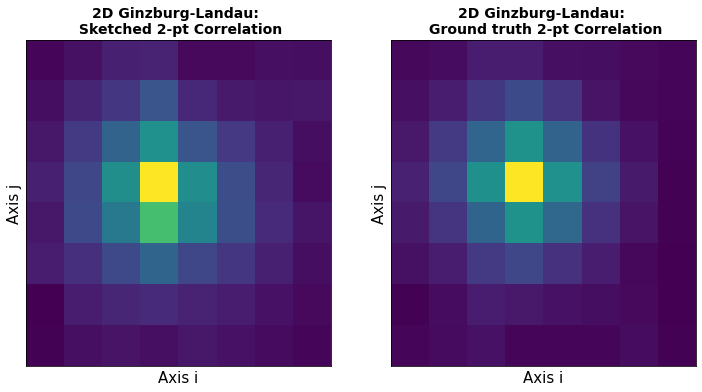

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the second heatmap
axs[0].imshow(sketched_correlation, aspect='auto', cmap='viridis', vmin=0, vmax=1)
axs[0].set_title('2D Ginzburg-Landau: \n Sketched 2-pt Correlation', fontsize=14, fontweight='bold')
axs[0].set_xticks([])
axs[0].set_xlabel('Axis i', fontsize=15)
axs[0].set_ylabel('Axis j', fontsize=15)

axs[0].set_yticks([])

# Plot the third heatmap
axs[1].imshow(true_correlation, aspect='auto', cmap='viridis', vmin=0, vmax=1)
axs[1].set_title('2D Ginzburg-Landau: \n Ground truth 2-pt Correlation', fontsize=14, fontweight='bold')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel('Axis i', fontsize=15)
axs[1].set_ylabel('Axis j', fontsize=15)

# Create a single colorbar for all subplots
cbar.ax.set_ylabel('Values', fontsize=12)

# plt.savefig(f"2D_GZ_2_pt_correlation_{d}.pdf", format="pdf", dpi=300)



# Result for 3D Ginzburg Landau

Original number of batches: 6000
Number of batches after filtering: 6000


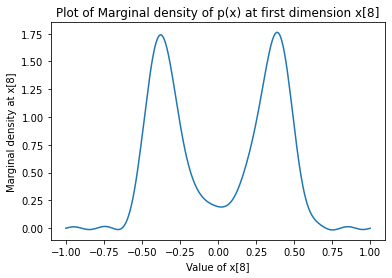

In [13]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt


def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def interlace_3d(i, j, k, l):
    """Interlace the binary representations of i and j up to length l."""
    i_bin = int_to_bin(i, l)
    j_bin = int_to_bin(j, l)
    k_bin = int_to_bin(k, l)
    interlaced = ''.join([a + b + c for a, b, c in zip(i_bin, j_bin, k_bin)])
    return int(interlaced, 2)

def transform_4d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n*n))
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                col_idx = interlace_3d(i, j, k, l)
                transformed_data[:, col_idx] = data[:, i, j, k]
    
    return transformed_data


# Load problem parameter
d = 64
L = 6
deg = 10

# Load data
data_path = f"./Data_deposit_script/Saved_Data/3D_GZ_data_d_{d}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples'][:, 1:-1, 1:-1, 1:-1]
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2,3))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_3d = transform_4d_to_2d(filtered_samples)

r = dict()
s = dict()
r_level = 8 + 0*np.arange(L,0, -1)
r_level[0] = 10
r_level[1] = 10
s_level = 5 + 1*np.arange(L,0, -1)
s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]



    
    
# Normalize range to [-1, 1]
y_3d = data_3d / 2.5
y_3d = y_3d[:6000, :]

# y_3d = y_3d[:100]

# Hierarchical Tensor Sketching
c_3d, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y_3d, L, d, deg, r = r, s = s, debug = True)
np.savez(f"./Data_deposit_script/Saved_Data/3D_GZ_data_d_{d}_solved_core.npz", c=c_3d, A_dict = A_dict, B_dict = B_dict)

htn_obtained_3d = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c_3d, deg = deg, ghost_pt = [])

x = np.zeros([200, d])
x[:, 8] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, 8], htn_obtained_3d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != 8]))
# plt.ylim([-100, np.max(tt_obtained.evaluate_marginal(x, mask = [1,2]))])
plt.xlabel('Value of x[8]')
plt.ylabel('Marginal density at x[8]')
plt.title('Plot of Marginal density of p(x) at first dimension x[8]')
plt.show()



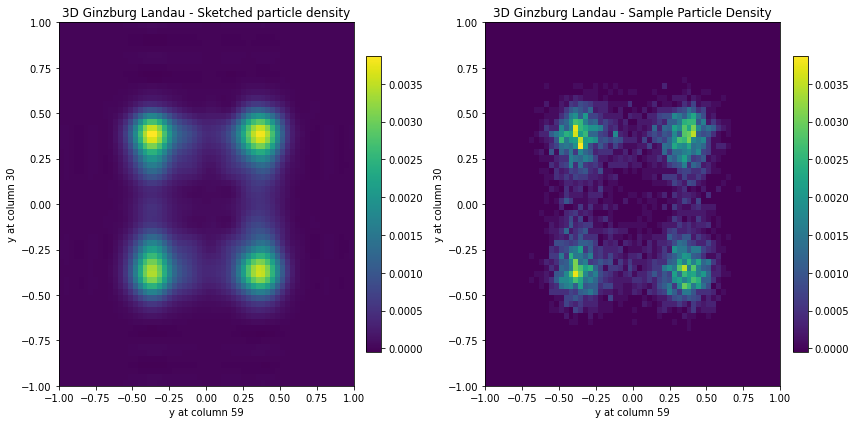

In [14]:
import numpy as np
import matplotlib.pyplot as plt

d = 64

# Parameters for columns
col1, col2 = 59, 30

# Create a grid
n_grid = 60
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained_3d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap[j, i] = evaluated_marginal[j*n_grid + i]
heatmap /= heatmap.sum()
# Extract the particle positions
particles = y_3d[:, [col1, col2]]

# Create a 2D histogram for particles
hist, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist /= hist.sum()  # Normalize

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_title("3D Ginzburg Landau - Sketched particle density")
axes[0].set_xlabel(f"y at column {col1}")
axes[0].set_ylabel(f"y at column {col2}")

# Heatmap for particles
im2 = axes[1].imshow(hist, extent=[-1, 1, -1, 1], origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
axes[1].set_title("3D Ginzburg Landau - Sample Particle Density")
axes[1].set_xlabel(f"y at column {col1}")
axes[1].set_ylabel(f"y at column {col2}")

plt.tight_layout()

# plt.savefig("3D_GZ.pdf", format="pdf", dpi=300)
plt.show()

